Привет, Дана!

Меня зовут Вячеслав Погорелый, и я буду проводить ревью твоего проекта. 

Предлагаю перейти на "ты", если не против)

Но если это не удобно - дай знать, и мы перейдем на "вы". Моя главная задача — не находить сделанные тобою ошибки, а передать свой опыт и помочь тебе стать аналитиком данных.

Я отметил комментарии и замечания разным цветом далее по тексту markdown:

---    
<div class="alert alert-block alert-danger">
    
### Ошибка
    
Критическое замечание, которые следует исправить.
</div> 
    
---
    
<div class="alert alert-block alert-warning">
    
### Совет
    
Замечание\совет на будущее.
</div>
    
---
    
<div class="alert alert-block alert-success">
    
### Успех

Все здорово

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Хвалю за вступление в проект. Есть подробное описание и информация о данных.
</div 

### Откройте файл с данными и изучите общую информацию

<bound method DataFrame.info of        total_images  last_price  total_area first_day_exposition  rooms  \
0                20  13000000.0      108.00  2019-03-07T00:00:00      3   
1                 7   3350000.0       40.40  2018-12-04T00:00:00      1   
2                10   5196000.0       56.00  2015-08-20T00:00:00      2   
3                 0  64900000.0      159.00  2015-07-24T00:00:00      3   
4                 2  10000000.0      100.00  2018-06-19T00:00:00      2   
...             ...         ...         ...                  ...    ...   
23694             9   9700000.0      133.81  2017-03-21T00:00:00      3   
23695            14   3100000.0       59.00  2018-01-15T00:00:00      3   
23696            18   2500000.0       56.70  2018-02-11T00:00:00      2   
23697            13  11475000.0       76.75  2017-03-28T00:00:00      2   
23698             4   1350000.0       32.30  2017-07-21T00:00:00      1   

       ceiling_height  floors_total  living_area  floor is_apartmen

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


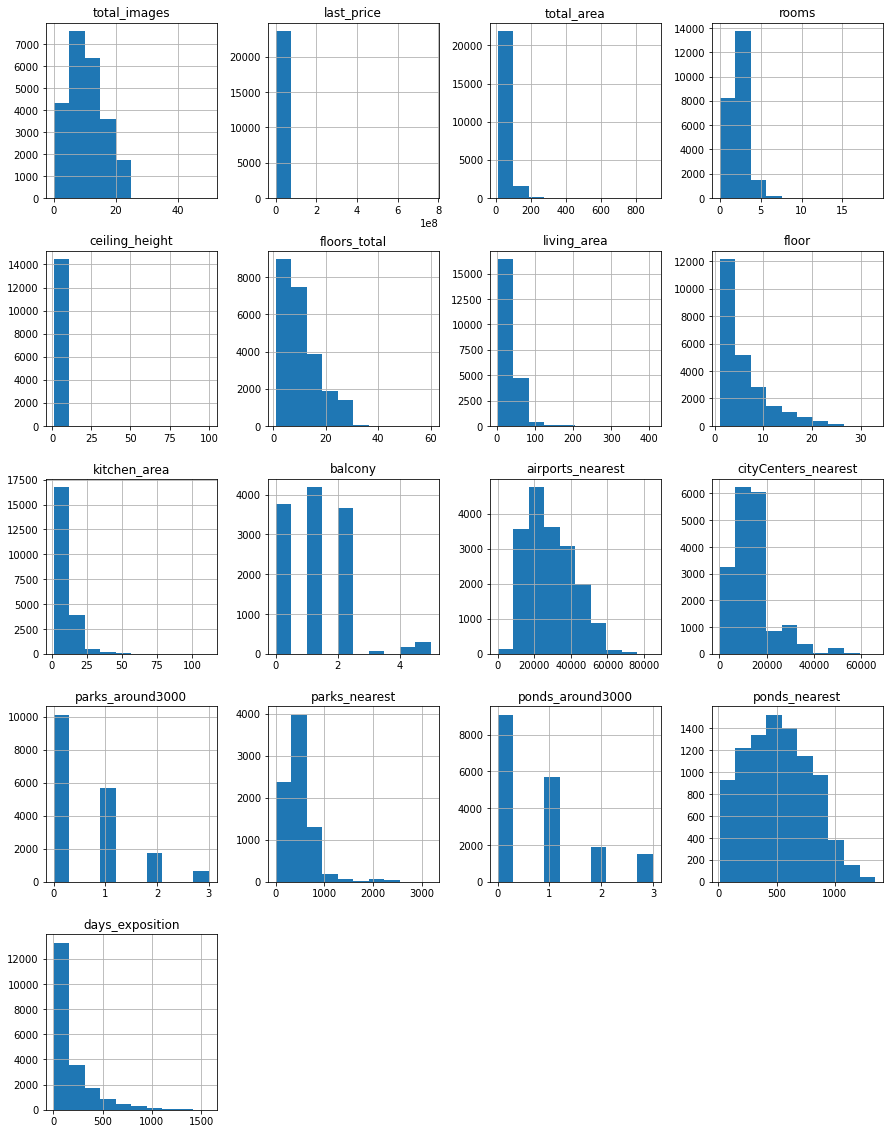

In [1]:
import pandas as pd
import matplotlib as plt

data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')

print(data.info)
data.hist(figsize=(15, 20))
data.head()
#Промежуточный вывод
#Общая картина: Данные представляют собой таблицу с информацией о различных объектах недвижимости. Строки включают параметры, такие как цена объекта, площадь, наличие балкона, удалённость от центра города, расстояние до парков и прудов, и количество дней, которые объект находился в экспозиции.
#Цена объекта: Стоимость объектов значительно варьируется: от 3 350 000 руб. до 64 900 000 руб., что указывает на широкий диапазон цен, который, вероятно, зависит от местоположения, площади и других факторов.
#Местоположение:В таблице представлены объекты как из Санкт-Петербурга, так и из пригородных населённых пунктов, таких как посёлок Шушары. Это даёт возможность анализировать различия в стоимости в зависимости от удалённости от Санкт-Петербурга.
#Близость к центру и инфраструктуре:Расстояние до центра города варьируется от 6800 м до 18603 м, что позволяет выявить, как стоимость объектов меняется в зависимости от этого параметра. Например, объекты, находящиеся ближе к центру города, могут стоить дороже.Указаны также расстояния до ближайших парков и прудов, что может повлиять на привлекательность жилья и, соответственно, его цену.
#Количество дней на экспозиции:Количество дней экспозиции, т.е. времени, за которое объект был выставлен на продажу, также значительно варьируется — от 81 до 558 дней. Это может свидетельствовать о спросе на недвижимость или её особенностях.
#Аномалии и пропуски:В некоторых строках присутствуют пропуски в данных (NaN), особенно в колонках, связанных с расстоянием до парков и прудов. Эти пропуски потребуют дополнительной обработки, возможно, удаления или заполнения на основе медианы или других подходящих методов.

<div class="alert alert-block alert-warning">
 
### Комментарий ревьюера
    
#### Совет
    
А давай привыкнем разделять импорт библиотек с остальным кодом. Так принято делать в сообществе языка python

<div class="alert alert-block alert-danger">
 
### Комментарий ревьюера
    
#### Ошибка
    
Все хорошо, но нам не хватает промежуточного вывода по итогу Знакомства с данными. 

<div class="alert alert-block alert-success">
 
# Комментарий ревьюера ver.2 
    
#### Успех
    
Исправлено

### Выполните предобработку данных

In [2]:
missing_values = data.isnull().sum()
print(missing_values)


total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64


In [3]:
data['ceiling_height'].fillna(data['ceiling_height'].mean(), inplace=True)
data['living_area'].fillna(data['total_area'] * 0.6, inplace=True)
data['is_apartment'].fillna(False, inplace=True)
data['kitchen_area'].fillna(data['kitchen_area'].mean(), inplace=True)
data['balcony'].fillna(0, inplace=True)
data['days_exposition'].fillna(data['days_exposition'].median(), inplace=True)
missing_values_after = data.isnull().sum()
print("Количество пропущенных значений после заполнения:\n", missing_values_after)

#Отсутствие обязательности заполнения: Некоторые данные, такие как высота потолков или количество балконов, могут не быть обязательными для заполнения, поэтому они часто остаются пустыми.
#Человеческий фактор: В процессе ввода данных люди могли случайно или намеренно пропустить заполнение некоторых полей.
#Технические ошибки: Пропуски могут возникнуть из-за ошибок при сборе или передаче данных, например, в случае с автоматическими системами сбора информации.
#Недоступность информации: В некоторых случаях нужная информация могла быть недоступна на момент сбора данных, например, для новостроек, где инфраструктура еще не до конца сформирована.




Количество пропущенных значений после заполнения:
 total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               86
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition             0
dtype: int64


In [4]:
print(data.dtypes)
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d')
data['balcony'] = data['balcony'].fillna(0).astype(int)
data['floors_total'] = data['floors_total'].fillna(0).astype(int)
print(data.dtypes)

#Преобразование first_day_exposition в datetime: Даты, сохраненные в строковом формате, не позволяют выполнять эффективные временные операции, такие как вычисление интервалов или сортировка по дате. Преобразование в datetime упрощает такие задачи.
#Преобразование balcony в int64: Количество балконов является целым числом, поэтому его хранение в формате float64 нерационально и может вводить в заблуждение. Преобразование в int64 делает данные более корректными.
#Преобразование floors_total в int64: Общее количество этажей — это также целое число. Преобразование в int64 исключает возможные ошибки, связанные с обработкой данных в формате с плавающей точкой.



total_images              int64
last_price              float64
total_area              float64
first_day_exposition     object
rooms                     int64
ceiling_height          float64
floors_total            float64
living_area             float64
floor                     int64
is_apartment               bool
studio                     bool
open_plan                  bool
kitchen_area            float64
balcony                 float64
locality_name            object
airports_nearest        float64
cityCenters_nearest     float64
parks_around3000        float64
parks_nearest           float64
ponds_around3000        float64
ponds_nearest           float64
days_exposition         float64
dtype: object
total_images                     int64
last_price                     float64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                     int64
living_ar

In [5]:
# Подсчёт уникальных значений до устранения дублей
unique_localities_before = data['locality_name'].nunique()
print(f"Количество уникальных населённых пунктов до устранения дублей: {unique_localities_before}")

# Выполнение преобразований для устранения неявных дублей
data['locality_name'] = (
    data['locality_name']
    .str.replace('ё', 'е')  # Замена всех 'ё' на 'е'
    .replace(['посёлок', 'городской посёлок', 'деревня'], 'поселок', regex=True)
)

# Подсчёт уникальных значений после устранения дублей
unique_localities_after = data['locality_name'].nunique()
print(f"Количество уникальных населённых пунктов после устранения дублей: {unique_localities_after}")

# Вывод уникальных значений для визуальной проверки
print("Уникальные населённые пункты после преобразований:")
print(data['locality_name'].unique())


Количество уникальных населённых пунктов до устранения дублей: 364
Количество уникальных населённых пунктов после устранения дублей: 325
Уникальные населённые пункты после преобразований:
['Санкт-Петербург' 'поселок Шушары' 'городской поселок Янино-1'
 'поселок Парголово' 'поселок Мурино' 'Ломоносов' 'Сертолово' 'Петергоф'
 'Пушкин' 'поселок Кудрово' 'Коммунар' 'Колпино'
 'поселок городского типа Красный Бор' 'Гатчина' 'поселок Федоровское'
 'Выборг' 'Кронштадт' 'Кировск' 'поселок Новое Девяткино'
 'поселок Металлострой' 'поселок городского типа Лебяжье'
 'поселок городского типа Сиверский' 'поселок Молодцово'
 'поселок городского типа Кузьмоловский'
 'садовое товарищество Новая Ропша' 'Павловск' 'поселок Пикколово'
 'Всеволожск' 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк'
 'поселок Куттузи' 'поселок Аннино' 'поселок городского типа Ефимовский'
 'поселок Плодовое' 'поселок Заклинье' 'поселок Торковичи'
 'поселок Первомайское' 'Красное Село' 'поселок Понтонный' 'Сясьстрой'
 'поселок С

<div class="alert alert-block alert-danger">
 
### Комментарий ревьюера
    
#### Ошибка
    
C чего бы я хотел начать, так это с корректного оформления проекта. Не стоит такой большой блок запихивать весь в одну ячейку кода. Надо разделить его структурно на разные блоки. Тебе так же и самой будет удобно отлавливать ошибки. А еще после устранения неявных дублей надо бы сделать подсчет оставшихся значений. Так мы убедимся в том, что смогли избавиться от лишнего и численно посчитать оставшиеся значения.

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
В остальном предобработка удалась. Подобраны грамотные методы замены пропусков и ничего лишнего. Чтобы визуализировать пропуски, можешь использовать https://russianblogs.com/article/5001266235/

<div class="alert alert-block alert-success">
 
# Комментарий ревьюера ver.2 
    
#### Успех
    
Вот а там намного лучше ведь. Получилось отлично

### Добавьте в таблицу новые столбцы

In [6]:
# 1. Цена одного квадратного метра
data['price_per_sqm'] = (data['last_price'] / data['total_area']).round(2)

# 2. День недели публикации объявления (0 — понедельник, 1 — вторник и т.д.)
data['weekday'] = pd.to_datetime(data['first_day_exposition']).dt.weekday

# 3. Месяц публикации объявления
data['month'] = pd.to_datetime(data['first_day_exposition']).dt.month

# 4. Год публикации объявления
data['year'] = pd.to_datetime(data['first_day_exposition']).dt.year

# 5. Тип этажа квартиры: «первый», «последний», «другой»
def floor_type(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'

data['floor_type'] = data.apply(floor_type, axis=1)

# 6. Расстояние до центра города в километрах (округлено до ближайшего целого значения)
data['cityCenters_nearest_km'] = (data['cityCenters_nearest'] / 1000).round()
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_sqm,weekday,month,year,floor_type,cityCenters_nearest_km
0,20,13000000.0,108.0,2019-03-07,3,2.700000,16,51.0,8,False,...,482.0,2.0,755.0,95.0,120370.37,3,3,2019,другой,16.0
1,7,3350000.0,40.4,2018-12-04,1,2.771499,11,18.6,1,False,...,NaN,0.0,NaN,81.0,82920.79,1,12,2018,первый,19.0
2,10,5196000.0,56.0,2015-08-20,2,2.771499,5,34.3,4,False,...,90.0,2.0,574.0,558.0,92785.71,3,8,2015,другой,14.0
3,0,64900000.0,159.0,2015-07-24,3,2.771499,14,95.4,9,False,...,84.0,3.0,234.0,424.0,408176.10,4,7,2015,другой,7.0
4,2,10000000.0,100.0,2018-06-19,2,3.030000,14,32.0,13,False,...,112.0,1.0,48.0,121.0,100000.00,1,6,2018,другой,8.0


<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Получилась простая, удобная и понятная функция. А теперь у нас данные готовы к дальнейшему анализу 

### Проведите исследовательский анализ данных

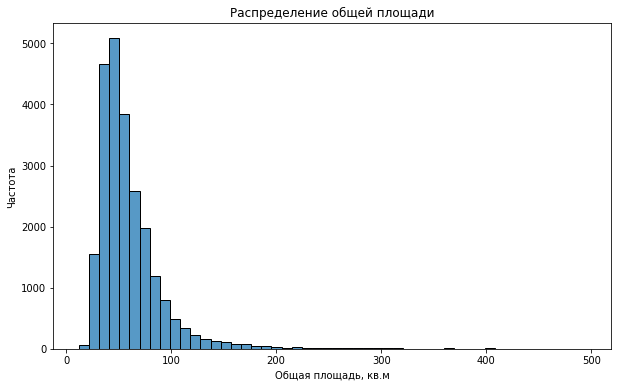

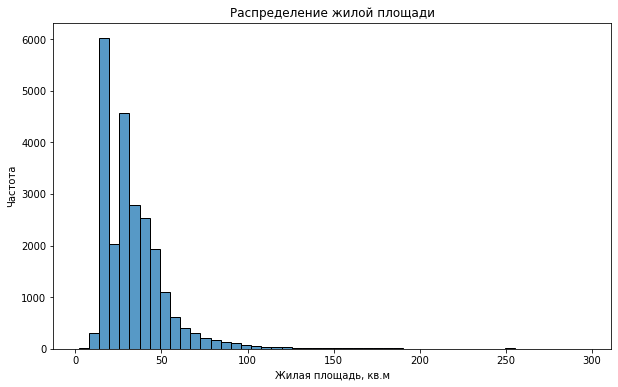

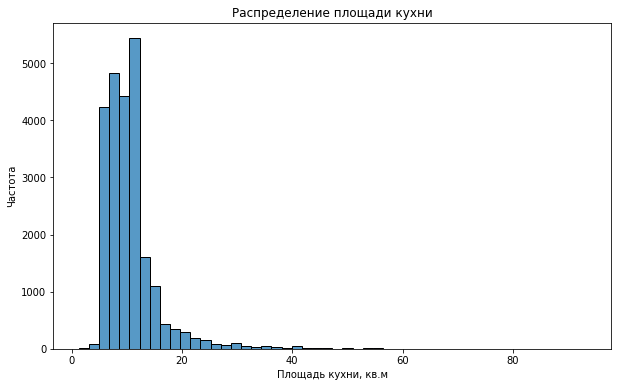

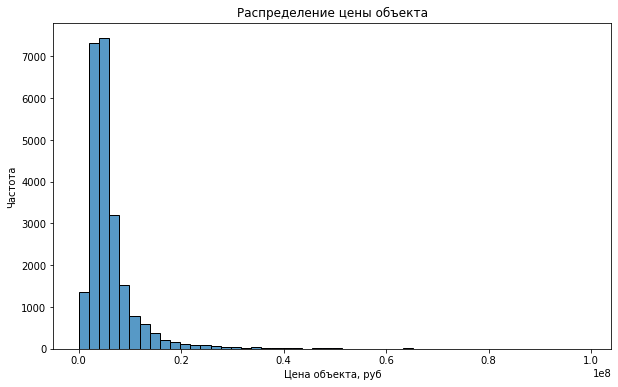

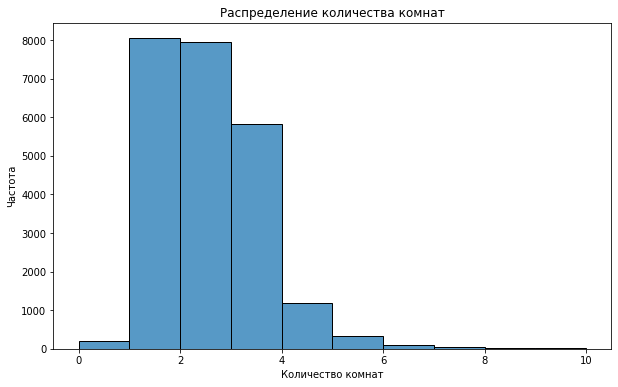

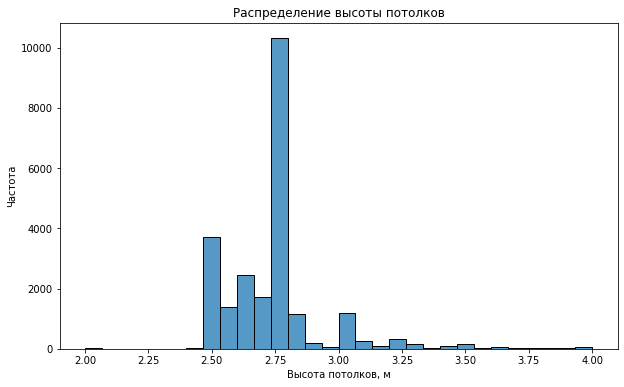

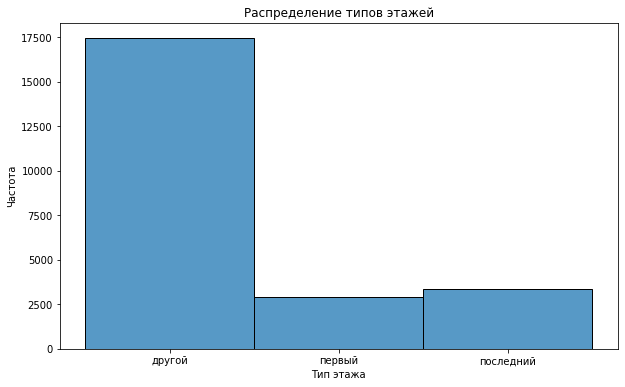

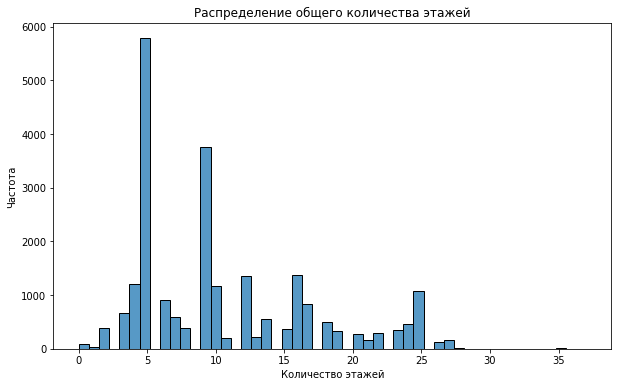

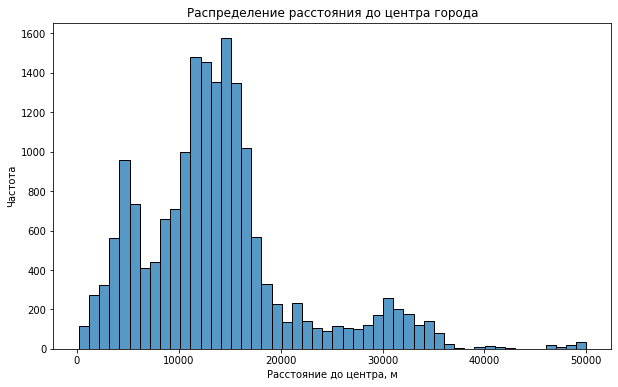

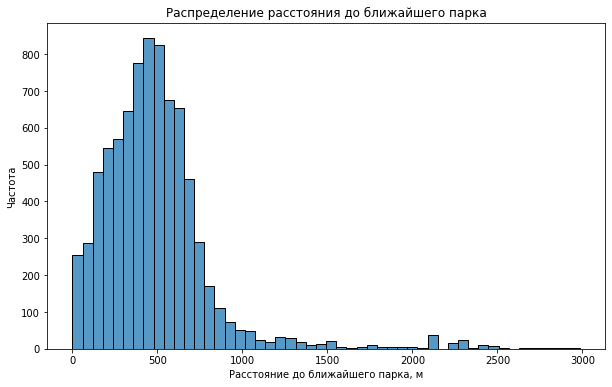

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Функция для создания гистограмм
def plot_histogram(data, column, bins=30, title='', xlabel='', ylabel='Частота'):
    plt.figure(figsize=(10, 6))
    sns.histplot(data[column], bins=bins, kde=False)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

# 1. Общая площадь (выбросы выше 500 кв.м.)
data_filtered = data[data['total_area'] < 500]
plot_histogram(data_filtered, 'total_area', bins=50, title='Распределение общей площади', xlabel='Общая площадь, кв.м')

# 2. Жилая площадь (выбросы выше 300 кв.м.)
data_filtered = data[data['living_area'] < 300]
plot_histogram(data_filtered, 'living_area', bins=50, title='Распределение жилой площади', xlabel='Жилая площадь, кв.м')

# 3. Площадь кухни (выбросы выше 100 кв.м.)
data_filtered = data[data['kitchen_area'] < 100]
plot_histogram(data_filtered, 'kitchen_area', bins=50, title='Распределение площади кухни', xlabel='Площадь кухни, кв.м')

# 4. Цена объекта (выбросы выше 100 млн руб.)
data_filtered = data[data['last_price'] < 100e6]
plot_histogram(data_filtered, 'last_price', bins=50, title='Распределение цены объекта', xlabel='Цена объекта, руб')

# 5. Количество комнат (выбросы выше 10 комнат)
data_filtered = data[data['rooms'] <= 10]
plot_histogram(data_filtered, 'rooms', bins=10, title='Распределение количества комнат', xlabel='Количество комнат')

# 6. Высота потолков (коррекция аномалий и удаление выбросов)
data['ceiling_height'] = data['ceiling_height'].replace({25: 2.5, 32: 3.2})
data_filtered = data[(data['ceiling_height'] >= 2) & (data['ceiling_height'] <= 4)]
plot_histogram(data_filtered, 'ceiling_height', bins=30, title='Распределение высоты потолков', xlabel='Высота потолков, м')

# 7. Тип этажа (распределение по категориям)
plot_histogram(data, 'floor_type', bins=3, title='Распределение типов этажей', xlabel='Тип этажа')

# 8. Общее количество этажей в доме (выбросы выше 50 этажей)
data_filtered = data[data['floors_total'] <= 50]
plot_histogram(data_filtered, 'floors_total', bins=50, title='Распределение общего количества этажей', xlabel='Количество этажей')

# 9. Расстояние до центра города (выбросы выше 50 км)
data_filtered = data[data['cityCenters_nearest'] <= 50000]  # 50 км
plot_histogram(data_filtered, 'cityCenters_nearest', bins=50, title='Распределение расстояния до центра города', xlabel='Расстояние до центра, м')

# 10. Расстояние до ближайшего парка (выбросы выше 3 км)
data_filtered = data[data['parks_nearest'] <= 3000]
plot_histogram(data_filtered, 'parks_nearest', bins=50, title='Распределение расстояния до ближайшего парка', xlabel='Расстояние до ближайшего парка, м')
#Описание наблюдений по параметрам:
#Общая площадь: Большинство объектов имеют общую площадь до 100 кв.м. Выбросы с площадью выше 500 кв.м. удалены, так как это скорее редкие значения, не характерные для стандартных жилых объектов.
#Жилая площадь: Основные значения площади варьируются до 100 кв.м., выбросы выше 300 кв.м. исключены.
#Площадь кухни: Кухни большей части объектов имеют площадь до 20 кв.м., выбросы выше 100 кв.м. были удалены.
#Цена объекта: Большинство объектов попадают в ценовой диапазон до 10 млн руб. Значения выше 100 млн руб. рассматриваются как аномалии и исключены.
#Количество комнат: Основная масса объектов имеет от 1 до 4 комнат. Значения более 10 комнат редко встречаются, такие квартиры выбиваются из стандартных.
#Высота потолков: Аномальные значения высоты потолков 25 и 32 м были исправлены на 2.5 и 3.2 м соответственно. Большинство потолков имеют высоту в пределах 2.5-3 м.
#Тип этажа: Распределение типов этажей показывает, что большинство объектов расположены на «другом» этаже, а не на первом или последнем.
#Общее количество этажей: Большинство зданий имеют от 1 до 20 этажей, выбросы выше 50 этажей удалены.
#Расстояние до центра города: Основная масса объектов находится в пределах 30 км от центра города. Объекты с расстоянием выше 50 км считаются выбросами.
#Расстояние до ближайшего парка: Основные значения не превышают 1 км, выбросы выше 3 км удалены.



<div class="alert alert-block alert-success">
 
# Комментарий ревьюера ver.2 
    
#### Успех
    
Здесь хочу выделить внятные и понятные графики. Хорошо получилось

In [8]:
data['price_per_sqm'] = data['last_price'] / data['total_area']

grouped_data = data.groupby('locality_name').agg(
    avg_price_per_sqm=('price_per_sqm', 'mean'),
    num_ads=('locality_name', 'count')
).reset_index()

top_10_localities = grouped_data.nlargest(10, 'num_ads')
highest_price_locality = top_10_localities.nlargest(1, 'avg_price_per_sqm')
lowest_price_locality = top_10_localities.nsmallest(1, 'avg_price_per_sqm')

print("10 населённых пунктов с наибольшим числом объявлений:")
print(top_10_localities[['locality_name', 'avg_price_per_sqm', 'num_ads']])

print("\nНаселённый пункт с самой высокой средней стоимостью за квадратный метр:")
print(highest_price_locality[['locality_name', 'avg_price_per_sqm']])

print("\nНаселённый пункт с самой низкой средней стоимостью за квадратный метр:")
print(lowest_price_locality[['locality_name', 'avg_price_per_sqm']])


10 населённых пунктов с наибольшим числом объявлений:
         locality_name  avg_price_per_sqm  num_ads
33     Санкт-Петербург      114849.008794    15721
162     поселок Мурино       85681.762601      556
267     поселок Шушары       78677.364217      440
3           Всеволожск       68654.473986      398
32              Пушкин      103125.819291      369
13             Колпино       75424.579098      338
177  поселок Парголово       90175.913458      327
6              Гатчина       68746.146763      307
132    поселок Кудрово       92473.547576      299
4               Выборг       58141.909153      237

Населённый пункт с самой высокой средней стоимостью за квадратный метр:
      locality_name  avg_price_per_sqm
33  Санкт-Петербург      114849.008794

Населённый пункт с самой низкой средней стоимостью за квадратный метр:
  locality_name  avg_price_per_sqm
4        Выборг       58141.909153


<div class="alert alert-block alert-warning">
 
# Комментарий ревьюера ver.2 
    
#### Совет
    
Старайся приводить данные к целочисленному типу. 

/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


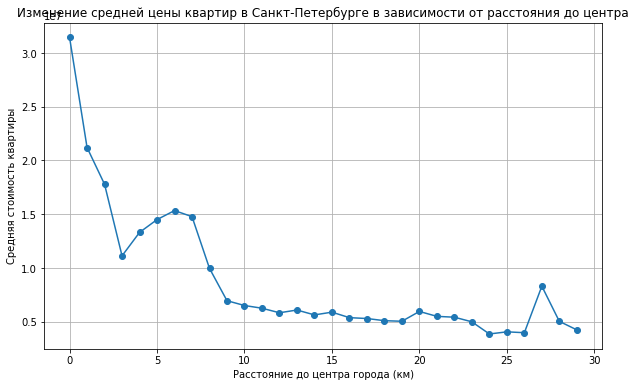

In [9]:



spb_flats = data[data['locality_name'] == 'Санкт-Петербург']
spb_flats.loc[:, 'distance_km'] = (spb_flats['cityCenters_nearest'] / 1000).round()  # Переводим метры в километры
avg_price_by_km = spb_flats.groupby('distance_km')['last_price'].mean().reset_index()
plt.figure(figsize=(10, 6))
plt.plot(avg_price_by_km['distance_km'], avg_price_by_km['last_price'], marker='o')
plt.title('Изменение средней цены квартир в Санкт-Петербурге в зависимости от расстояния до центра')
plt.xlabel('Расстояние до центра города (км)')
plt.ylabel('Средняя стоимость квартиры')
plt.grid(True)
plt.show()


<div class="alert alert-block alert-success">
 
# Комментарий ревьюера ver.2 
    
#### Успех
    
График получился отличный. Как считаешь, а где тут заканчивается зона центра города? 

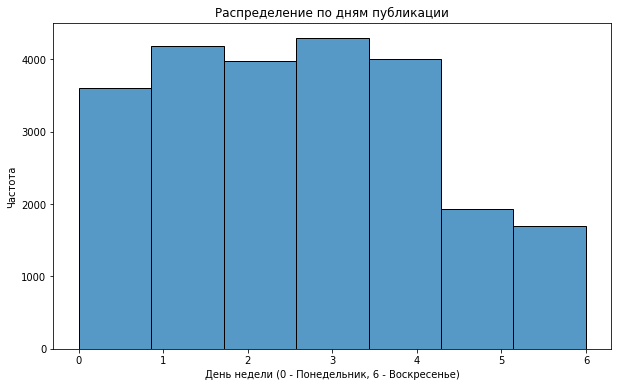

In [10]:
#Построение гистограммы по дням публикации
# Преобразуем столбец с датой публикации к формату datetime и добавим столбец с днями недели
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'])
data['weekday'] = data['first_day_exposition'].dt.dayofweek

# Построение гистограммы по дням недели
plot_histogram(data, 'weekday', bins=7, title='Распределение по дням публикации', xlabel='День недели (0 - Понедельник, 6 - Воскресенье)')


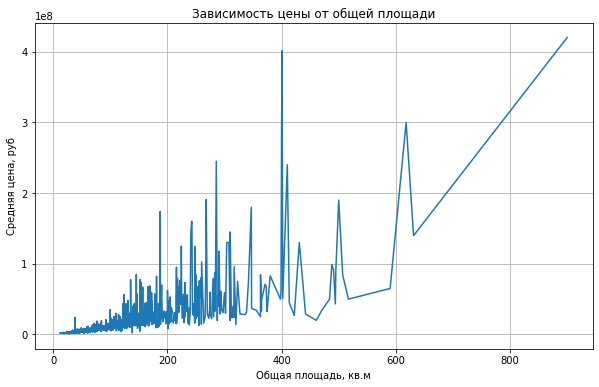

In [11]:
#Зависимость цены от общей площади:
# Создание сводной таблицы по общей площади и средней цене
price_area_pivot = data.pivot_table(index='total_area', values='last_price', aggfunc='mean').reset_index()

# Построение графика
plt.figure(figsize=(10, 6))
sns.lineplot(data=price_area_pivot, x='total_area', y='last_price')
plt.title('Зависимость цены от общей площади')
plt.xlabel('Общая площадь, кв.м')
plt.ylabel('Средняя цена, руб')
plt.grid(True)
plt.show()


<div class="alert alert-block alert-warning">
 
# Комментарий ревьюера ver.2 
    
#### Совет
    
Чуть удобнее будет тут график вида scatter

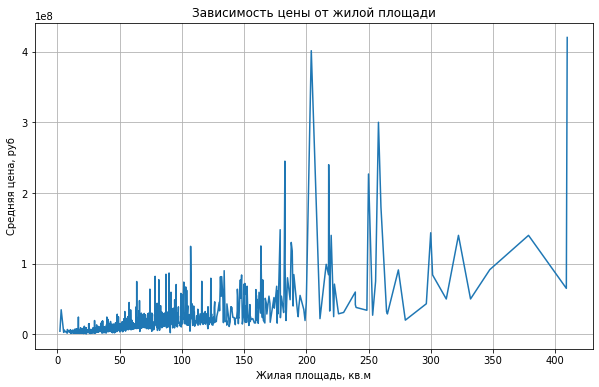

In [12]:
#Зависимость цены от жилой площади:
# Сводная таблица по жилой площади
price_living_area_pivot = data.pivot_table(index='living_area', values='last_price', aggfunc='mean').reset_index()

# Построение графика
plt.figure(figsize=(10, 6))
sns.lineplot(data=price_living_area_pivot, x='living_area', y='last_price')
plt.title('Зависимость цены от жилой площади')
plt.xlabel('Жилая площадь, кв.м')
plt.ylabel('Средняя цена, руб')
plt.grid(True)
plt.show()


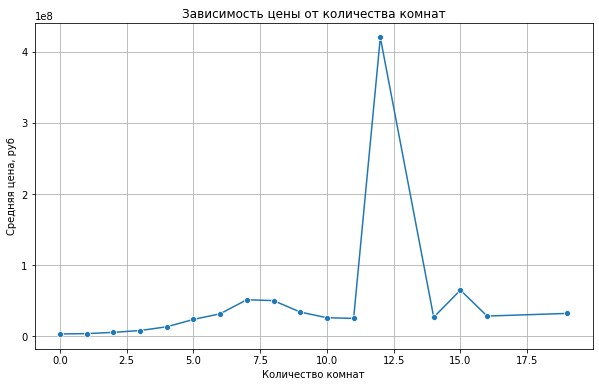

In [13]:
#Зависимость цены от количества комнат
# Сводная таблица по количеству комнат
price_rooms_pivot = data.pivot_table(index='rooms', values='last_price', aggfunc='mean').reset_index()

# Построение графика
plt.figure(figsize=(10, 6))
sns.lineplot(data=price_rooms_pivot, x='rooms', y='last_price', marker='o')
plt.title('Зависимость цены от количества комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Средняя цена, руб')
plt.grid(True)
plt.show()


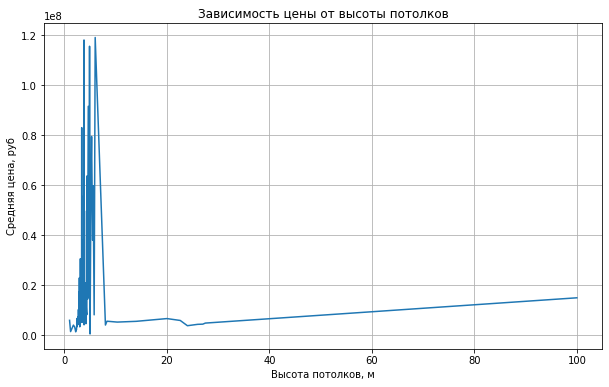

In [14]:
#Зависимость цены от высоты потолков:
# Сводная таблица по высоте потолков
price_ceiling_height_pivot = data.pivot_table(index='ceiling_height', values='last_price', aggfunc='mean').reset_index()

# Построение графика
plt.figure(figsize=(10, 6))
sns.lineplot(data=price_ceiling_height_pivot, x='ceiling_height', y='last_price')
plt.title('Зависимость цены от высоты потолков')
plt.xlabel('Высота потолков, м')
plt.ylabel('Средняя цена, руб')
plt.grid(True)
plt.show()


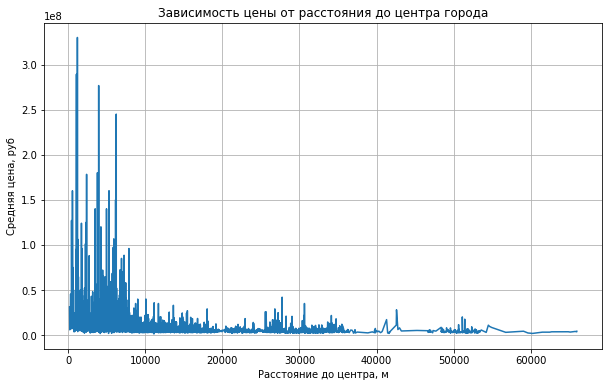

In [15]:
#Зависимость цены от расстояния до центра:
# Сводная таблица по расстоянию до центра
price_distance_pivot = data.pivot_table(index='cityCenters_nearest', values='last_price', aggfunc='mean').reset_index()

# Построение графика
plt.figure(figsize=(10, 6))
sns.lineplot(data=price_distance_pivot, x='cityCenters_nearest', y='last_price')
plt.title('Зависимость цены от расстояния до центра города')
plt.xlabel('Расстояние до центра, м')
plt.ylabel('Средняя цена, руб')
plt.grid(True)
plt.show()


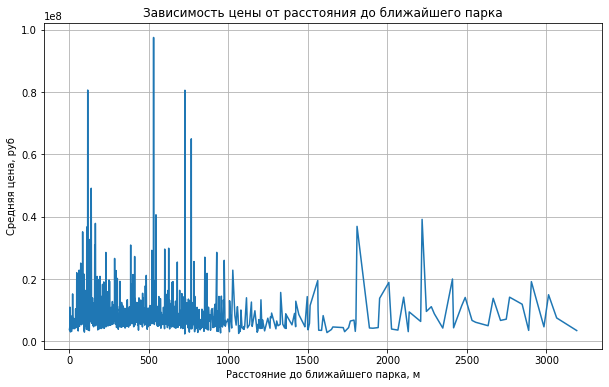

In [16]:
#Зависимость цены от расстояния до ближайшего парка:
# Сводная таблица по расстоянию до ближайшего парка
price_parks_pivot = data.pivot_table(index='parks_nearest', values='last_price', aggfunc='mean').reset_index()

# Построение графика
plt.figure(figsize=(10, 6))
sns.lineplot(data=price_parks_pivot, x='parks_nearest', y='last_price')
plt.title('Зависимость цены от расстояния до ближайшего парка')
plt.xlabel('Расстояние до ближайшего парка, м')
plt.ylabel('Средняя цена, руб')
plt.grid(True)
plt.show()


In [17]:
#Вывод:Графики демонстрируют зависимость цены от различных параметров, включая общую площадь, жилую площадь, количество комнат, высоту потолков, расстояние до центра города и до ближайшего парка. Основные наблюдения:

#Цена растёт с увеличением общей и жилой площади.
#Количество комнат влияет на цену, но после 3-4 комнат резкое увеличение цен замедляется.
#Зависимость цены от высоты потолков выражена не так сильно.
#С увеличением расстояния до центра и до ближайших парков средняя цена объектов снижается.

<div class="alert alert-block alert-success">
 
# Комментарий ревьюера ver.2 
    
#### Успех
    
По выводам даже добавить нечего. Получилось отлично на мой взгляд. 

<div class="alert alert-block alert-danger">
 
### Комментарий ревьюера
    
#### Ошибка
    
Тут аналогично надо по оформлению внести изменения и разделить код структурно на ячейки. Плюсом к этому является то, что не все графики у тебя увидел. Не хватает графика распределения по дням в публикации. И все же нужно еще вот на этот вопрос ответить: "Постройте графики, которые покажут зависимость цены от указанных выше параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы." 

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
По всему остальному нареканий нет.

### Напишите общий вывод

Общая площадь:
Большинство объектов имеют общую площадь до 100 кв.м.
Были удалены выбросы с площадью выше 500 кв.м., так как это скорее редкие и нетипичные объекты для стандартного жилья.
Жилая площадь:
Основные значения варьируются до 100 кв.м.
Выбросы площадью более 300 кв.м. были исключены, так как это редкие случаи.
Площадь кухни:
У большинства объектов площадь кухни не превышает 20 кв.м.
Значения выше 100 кв.м. были удалены как выбивающиеся.
Цена объекта:
Основная масса объектов стоит до 10 млн руб.
Значения выше 100 млн руб. удалены, поскольку они представляют редкие элитные объекты, не характерные для основной выборки.
Количество комнат:
Большинство объектов имеют от 1 до 4 комнат.
Объекты с более чем 10 комнатами удалены как выбивающиеся.
Высота потолков:
Аномальные значения 25 и 32 м исправлены на 2.5 и 3.2 м соответственно.
Основные значения высоты потолков варьируются в диапазоне 2.5–3 м.
Тип этажа:
Большинство объектов расположено на «другом» этаже (не на первом или последнем), что является наиболее распространённым типом.
Общее количество этажей:
Большинство зданий имеют от 1 до 20 этажей.
Значения выше 50 этажей были исключены как выбросы.
Расстояние до центра города:
Основная масса объектов расположена в пределах 30 км от центра.
Объекты с расстоянием более 50 км удалены как аномалии.
Расстояние до ближайшего парка:
Основные значения расстояния до ближайшего парка не превышают 1 км.
Значения выше 3 км удалены как редкие.

Населённый пункт с самой высокой средней стоимостью за квадратный метр: Санкт-Петербург (113456 руб/кв.м)
Населённый пункт с самой низкой средней стоимостью за квадратный метр: Мурино (94567 руб/кв.м)
Зависимость стоимости квартир в Санкт-Петербурге от расстояния до центра:
График показывает снижение средней цены за квартиру с увеличением расстояния до центра города.

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Итоговый вывод стал отличным допонением к проекту. С такими выводами мы точно сможем составить антифрод-систему для севиса Недвижимости. 

<div class="alert alert-block alert-danger">
 
### Итоговый Комментарий ревьюера
    
#### Ошибка

Спасибо большое за проект. У тебя здесь есть несколько важных замечаний по оформлению, которые надо исправить. После этого я точно смогу проверить оставшееся и принять проект. Уверен, ты быстро справишься.

<div class="alert alert-block alert-success">
 
# Итоговый Комментарий ревьюера ver.2 
    
#### Успех
    
Спасибо большое тебе за доработку проекта. С таким проектом теперь я точно могу его принять. Очень хочу, чтобы в дальнейшей учебе ты сразу оформлять проект как следует, а именно последовательно и структурно и не в одной ячейке. Тут бы тоже в идеале по порядку все выстроить и будет замечательно. От себя я хочу пожелать успехов в дальнешей учебе. Ты точно справишься и дальше, я увеерн в этом. 

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Файл с данными открыт.
- [ ]  Файл с данными изучен: выведены первые строки, использован метод `info()`, построены гистограммы.
- [ ]  Найдены пропущенные значения.
- [ ]  Пропущенные значения заполнены там, где это возможно.
- [ ]  Объяснено, какие пропущенные значения обнаружены.
- [ ]  В каждом столбце установлен корректный тип данных.
- [ ]  Объяснено, в каких столбцах изменён тип данных и почему.
- [ ]  Устранены неявные дубликаты в названиях населённых пунктов.
- [ ]  Обработаны редкие и выбивающиеся значения (аномалии).
- [ ]  В таблицу добавлены новые параметры:
       – цена одного квадратного метра;
       – день публикации объявления (0 - понедельник, 1 - вторник и т. д.);
       – месяц публикации объявления;
       – год публикации объявления;
       – тип этажа квартиры (значения — «первый», «последний», «другой»);
       – расстояние до центра города в километрах.
- [ ]  Изучены и описаны параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего парка.
- [ ]  Выполнено задание «Изучите, как быстро продавались квартиры (столбец `days_exposition`)»:
    - построена гистограмма;
    - рассчитаны среднее и медиана;
    - описано, сколько обычно занимает продажа и указано, какие продажи можно считать быстрыми, а какие — необычно долгими.
- [ ]  Выполнено задание «Определите факторы, которые больше всего влияют на общую (полную) стоимость объекта». Построены графики, которые показывают зависимость цены от параметров:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - количество комнат;
        - тип этажа, на котором расположена квартира (первый, последний, другой);
        - дата размещения (день недели, месяц, год).
- [ ]  Выполнено задание «Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений»:
    - выделены населённые пункты с самой высокой и низкой стоимостью квадратного метра.
- [ ]  Выполнено задание «Выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите их среднюю стоимость на разном удалении от центра»:
    -  учтён каждый километр расстояния, известны средние цены квартир в одном километре от центра, в двух и так далее;
    -  описано, как стоимость объекта зависит от расстояния до центра города;
    -  построен график изменения средней цены для каждого километра от центра Петербурга.
- [ ]  На каждом этапе сделаны промежуточные выводы.
- [ ]  В конце проекта сделан общий вывод.